# Stock Predictor
<center>
    <img src="assets/bezos.jpg" />
</center>


In [13]:
# Description: This program uses the three moving average crossover strategy 
#              to determine when to buy and sell stock
# https://www.youtube.com/watch?v=rO_cqa4x60o

In [14]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
# Load the data
df = pd.read_csv('TSLA.csv')

# Set the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# Show the data
df

,Date,Close,Volume,Open,High,Low
2022-06-06,6/06/2022,714.84,28068170,733.060,734.6000,703.0500
2022-06-03,6/03/2022,703.55,37464580,729.675,743.3899,700.2534
2022-06-02,6/02/2022,775.00,31157710,732.470,792.6300,726.2000
2022-06-01,6/01/2022,740.37,25749320,755.160,771.9800,730.9200
2022-05-31,05/31/2022,758.26,33971460,773.840,778.8000,734.2300
...,...,...,...,...,...,...
2021-06-11,6/11/2021,609.89,16205300,610.230,612.5600,601.5200
2021-06-10,6/10/2021,610.12,23919610,603.880,616.5900,600.5000
2021-06-09,6/09/2021,598.78,16584570,602.170,611.7900,597.6301
2021-06-08,6/08/2021,603.59,26053410,623.010,623.0900,595.5000


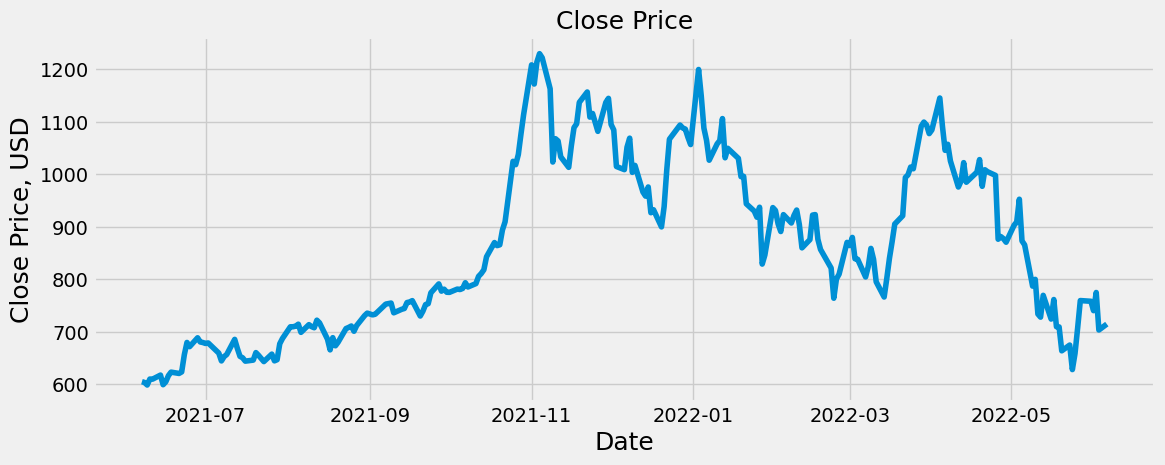

In [16]:
# Visualize the data
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price, USD', fontsize = 18)
plt.show()

In [17]:
# Calculate the three moving averages
# Calculate the short/fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust = False).mean()
# Calculate the long/slow exponential moving average
LongEMA = df.Close.ewm(span=63, adjust = False).mean()
# Calculate the Middle/medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust = False).mean()

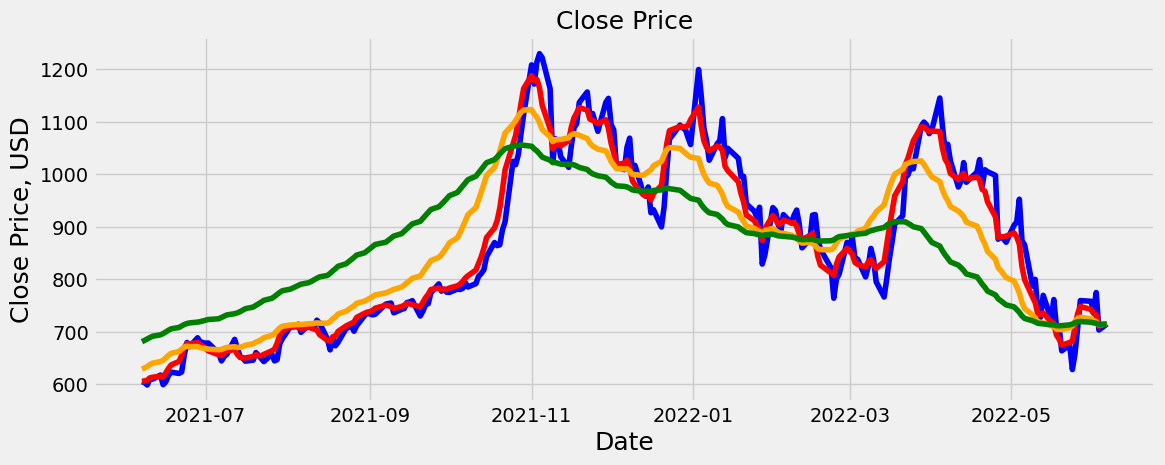

In [18]:
# Visualize the closing price and the exponential moving averages
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize = 18)
plt.plot(df['Close'], label = 'Close Price', color = 'blue')
plt.plot(ShortEMA, label = 'Short/Fast', color = 'red')
plt.plot(MiddleEMA, label = 'Middle/Medium', color = 'orange')
plt.plot(LongEMA, label = 'Long/Slow', color = 'green')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price, USD', fontsize = 18)
plt.show()

In [19]:
# Add the exponential averages to the dataset
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA

In [20]:
# Show the df
df

,Date,Close,Volume,Open,High,Low,Short,Middle,Long
2022-06-06,6/06/2022,714.84,28068170,733.060,734.6000,703.0500,714.840000,714.840000,714.840000
2022-06-03,6/03/2022,703.55,37464580,729.675,743.3899,700.2534,711.076667,713.813636,714.487188
2022-06-02,6/02/2022,775.00,31157710,732.470,792.6300,726.2000,732.384444,719.376033,716.378213
2022-06-01,6/01/2022,740.37,25749320,755.160,771.9800,730.9200,735.046296,721.284576,717.127956
2022-05-31,05/31/2022,758.26,33971460,773.840,778.8000,734.2300,742.784198,724.645978,718.413333
...,...,...,...,...,...,...,...,...,...
2021-06-11,6/11/2021,609.89,16205300,610.230,612.5600,601.5200,613.566364,640.362663,691.671061
2021-06-10,6/10/2021,610.12,23919610,603.880,616.5900,600.5000,612.417576,637.613330,689.122590
2021-06-09,6/09/2021,598.78,16584570,602.170,611.7900,597.6301,607.871717,634.083027,686.299384
2021-06-08,6/08/2021,603.59,26053410,623.010,623.0900,595.5000,606.444478,631.310934,683.714716


In [21]:
# Create the function to buy and sell the stock
def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0, len(data)):
        # if Middle  line goes below the long line AND short goes below the Middle
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)

In [22]:
# Add the buy and sell signals to the dataset
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

In [23]:
# Show new  dataframe table
df

,Date,Close,Volume,Open,High,Low,Short,Middle,Long,Buy,Sell
2022-06-06,6/06/2022,714.84,28068170,733.060,734.6000,703.0500,714.840000,714.840000,714.840000,NaN,NaN
2022-06-03,6/03/2022,703.55,37464580,729.675,743.3899,700.2534,711.076667,713.813636,714.487188,703.55,NaN
2022-06-02,6/02/2022,775.00,31157710,732.470,792.6300,726.2000,732.384444,719.376033,716.378213,NaN,775.0
2022-06-01,6/01/2022,740.37,25749320,755.160,771.9800,730.9200,735.046296,721.284576,717.127956,740.37,NaN
2022-05-31,05/31/2022,758.26,33971460,773.840,778.8000,734.2300,742.784198,724.645978,718.413333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-11,6/11/2021,609.89,16205300,610.230,612.5600,601.5200,613.566364,640.362663,691.671061,NaN,NaN
2021-06-10,6/10/2021,610.12,23919610,603.880,616.5900,600.5000,612.417576,637.613330,689.122590,NaN,NaN
2021-06-09,6/09/2021,598.78,16584570,602.170,611.7900,597.6301,607.871717,634.083027,686.299384,NaN,NaN
2021-06-08,6/08/2021,603.59,26053410,623.010,623.0900,595.5000,606.444478,631.310934,683.714716,NaN,NaN


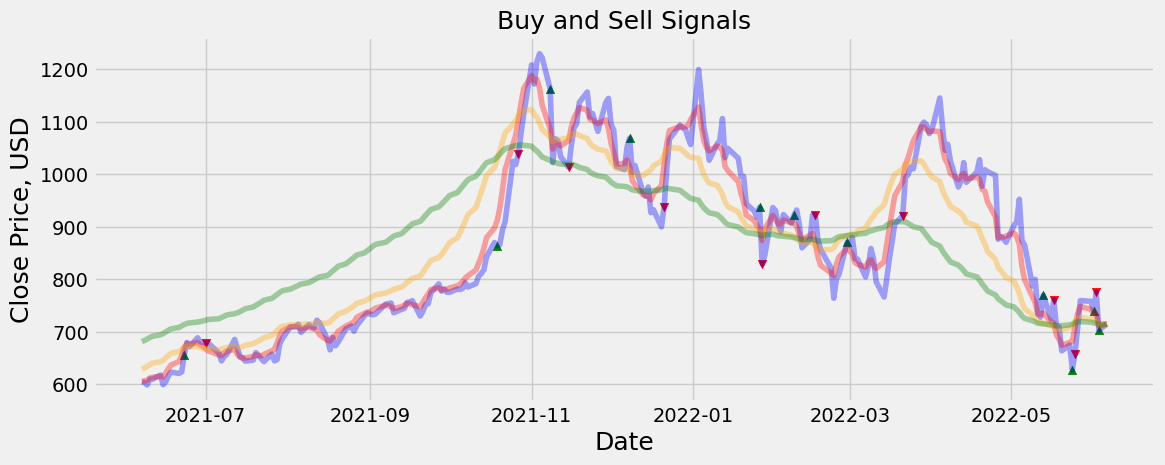

In [24]:
# Visualize the Buy and Sell signals
plt.figure(figsize=(12.2, 4.5))
plt.title('Buy and Sell Signals', fontsize = 18)
plt.plot(df['Close'], label = 'Close Price', color = 'blue', alpha = .35)
plt.plot(ShortEMA, label = 'Short/Fast', color = 'red', alpha = .35)
plt.plot(MiddleEMA, label = 'Middle/Medium', color = 'orange', alpha = .35)
plt.plot(LongEMA, label = 'Long/Slow', color = 'green', alpha = .35)
plt.scatter(df.index, df['Buy'], label = 'Buy', color = 'green', marker ='^', alpha = 1)
plt.scatter(df.index, df['Sell'], label = 'Sell', color = 'red', marker ='v', alpha = 1)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price, USD', fontsize = 18)
plt.show()